# A Deep Learning based Efficacy Prediction System for Drug Discovery

In [1]:
########################################################
# All rights reserved. 
# Author: XIE Zhengwei @ Beijing Gigaceuticals Tech Co., Ltd 
#                      @ Peking University International Cancer Institute
# Contact: xiezhengwei@gmail.com
#
#
########################################################
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from dleps_predictor import DLEPS


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Using TensorFlow backend.




Load the SMILES for natural products and FDA approved drugs

In [2]:

smi = pd.read_csv('../../data/Brief_Targetmol_natural_product_2719')
fda = pd.read_csv('../../data/Brief_FDA-Approved-Drug_961')


In [3]:
smi


,Unnamed: 0,ID,Name,CAS Number,SMILES
0,0,TCS0002,Visnagin,82-57-5,CC1=CC(=O)C2=C(O1)C=C3C(=C2OC)C=CO3
1,1,TTS0001,Khellin,82-02-0,COC1=C2OC(C)=CC(=O)C2=C(OC)C2=C1OC=C2
2,2,TCS0010,Trans-caffeic acid,501-16-6,C1=CC(=C(C=C1C=CC(=O)O)O)O
3,3,TCS0008,Ethyl (E)-ferulate,28028-62-8,CCOC(=O)C=CC1=CC(=C(C=C1)O)OC
4,4,TCS0005,Ethyl (E)-3'-hydroxy-4'-methoxycinnamate,155401-23-3,CCOC(=O)C=CC1=CC(=C(C=C1)OC)O
...,...,...,...,...,...
2714,2714,TTP2993,Panthenol,16485-10-2,CC(C)(CO)C(O)C(=O)NCCCO
2715,2715,TTP2996,L-Ornithine,70-26-8,NCCCC(N)C(O)=O
2716,2716,T2P2994,4-Aminobutyric acid,1956-12-2,NCCCC(O)=O
2717,2717,TTP2998,Xanthone,90-47-1,O=C1C2=CC=CC=C2OC2=CC=CC=C12




Load the DLEPS model. DLEPS requires up set of genes and down set of genes to calculate cs = a - b , or only one set for calculating a.

In [5]:
predictor = DLEPS(reverse=False, up_name='../../data/BROWNING_up',down_name='../../data/BROWNING_down',save_exp=None)


../../data/BROWNING_up
(127, 1)
[2289, 6515, 18, 23284, 6332, 1535, 225, 4969, 128553, 713, 273, 89944, 3489, 894, 183, 10089, 894, 4811, 3479, 637, 5919, 5176, 26577, 8534, 7056, 6586, 2246, 1009, 301, 112464, 2162, 2867, 8707, 56301, 1075, 3075, 3487, 55722, 7253, 26227, 2200, 4094, 8707, 6641, 5792, 894, 5598, 712, 2335, 2331, 2331, 1803, 10462, 23329, 7490, 4321, 6943, 10512, 9747, 7791, 89944, 165, 26227, 80114, 27303, 10149, 9843, 2202, 54796, 57828, 11096, 8407, 12, 7018, 2331, 2012, 91851, 3224, 2823, 26227, 3995, 4826, 5325, 23596, 3952, 3995, 717, 5179, 6590, 29968, 23767, 29968, 717, 91851, 10149, 80761, 25797, 91851, 2940, 7348, 216, 2331, 6623, 6783, 80761]
../../data/BROWNING_down
(130, 1)
[1149, 7350, 79741, 1346, 3777, 26027, 2170, 1734, 56997, 3777, 84830, 5026, 10205, 1370, 3164, 375449, 4151, 5465, 1908, 5997, 9026, 10205, 26027, 5166, 25841, 51807, 1787, 53405, 79071, 1734, 4137, 8395, 54802, 10449, 6470, 25849, 3423, 7200, 8671, 3777, 9746, 2820, 2998, 2766, 23603,



The model structure showed followed

In [6]:
predictor.model[0].summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 277, 76)      0                                            
__________________________________________________________________________________________________
conv_1 (Conv1D)                 (None, 269, 9)       6165        input_8[0][0]                    
__________________________________________________________________________________________________
conv_2 (Conv1D)                 (None, 261, 9)       738         conv_1[0][0]                     
__________________________________________________________________________________________________
conv_3 (Conv1D)                 (None, 251, 10)      1000        conv_2[0][0]                     
___________________________________________________________________________________________



Execute model inference, input requires a SMILES array, output is a cs array with -2 for unsuccessed processing. 
predict function has the followed options:
predict(self, setmean = False, save_onehot=None, load_onehot=None, reverse = True, base = -2, up_name='\', down_name='', save_exp = None)

setmean : False, z score (Change of Transcriptional Profiles, CTP) = expression level - mean, setmean refers to mean of expression files for user inputed chemicals \
save_onehot: None, save onehot array for the current chemical set for future use \
load_onehot: None, load onehot if onehot files have been saved \
reverse: True, do user want to reverse the input up / down gene set, only works for the paired input \
base: -2, default value for error parsed small molecules

In [7]:
scores = predictor.predict(fda['SMILES'].values)
#scores = predictor.predict(celastrol)

DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large

In [8]:
fda

,Unnamed: 0,ID,Name,CAS Number,SMILES
0,0,S1001,Navitoclax (ABT-263),923564-51-6,CC1(C)CCC(=C(CN2CCN(CC2)C2=CC=C(C=C2)C(=O)NS(=...
1,1,S1003,Linifanib (ABT-869),796967-16-3,CC1=CC(NC(=O)NC2=CC=C(C=C2)C2=C3C(N)=NNC3=CC=C...
2,2,S1004,Veliparib (ABT-888),912444-00-9,C[C@@]1(CCCN1)C1=NC2=C(C=CC=C2N1)C(N)=O
3,3,S1005,Axitinib,319460-85-0,CNC(=O)C1=CC=CC=C1SC1=CC2=C(C=C1)C(\C=C\C1=CC=...
4,4,S1006,Saracatinib (AZD0530),379231-04-6,CN1CCN(CCOC2=CC(OC3CCOCC3)=C3C(NC4=C(Cl)C=CC5=...
...,...,...,...,...,...
956,956,S4653,L-Ornithine,70-26-8,NCCC[C@H](N)C(O)=O
957,957,S4671,Cefradine,38821-53-3,[H][C@]12SCC(C)=C(N1C(=O)[C@H]2NC(=O)[C@H](N)C...
958,958,S4684,Sildenafil,139755-83-2,CCCC1=NN(C)C2=C1N=C(NC2=O)C1=CC(=CC=C1OCC)S(=O...
959,959,S4700,4-Aminobutyric acid,56-12-2,NCCCC(O)=O




Visualize the cs scores

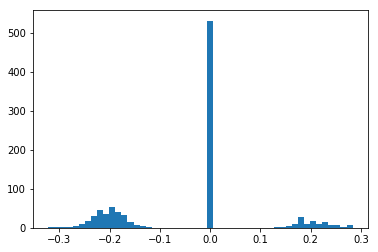

In [9]:
plt.hist(scores,50)
plt.show()

In [10]:
fda['score'] = scores

In [11]:
fda

,Unnamed: 0,ID,Name,CAS Number,SMILES,score
0,0,S1001,Navitoclax (ABT-263),923564-51-6,CC1(C)CCC(=C(CN2CCN(CC2)C2=CC=C(C=C2)C(=O)NS(=...,0.000000
1,1,S1003,Linifanib (ABT-869),796967-16-3,CC1=CC(NC(=O)NC2=CC=C(C=C2)C2=C3C(N)=NNC3=CC=C...,0.000000
2,2,S1004,Veliparib (ABT-888),912444-00-9,C[C@@]1(CCCN1)C1=NC2=C(C=CC=C2N1)C(N)=O,-0.267931
3,3,S1005,Axitinib,319460-85-0,CNC(=O)C1=CC=CC=C1SC1=CC2=C(C=C1)C(\C=C\C1=CC=...,0.000000
4,4,S1006,Saracatinib (AZD0530),379231-04-6,CN1CCN(CCOC2=CC(OC3CCOCC3)=C3C(NC4=C(Cl)C=CC5=...,0.000000
...,...,...,...,...,...,...
956,956,S4653,L-Ornithine,70-26-8,NCCC[C@H](N)C(O)=O,0.200941
957,957,S4671,Cefradine,38821-53-3,[H][C@]12SCC(C)=C(N1C(=O)[C@H]2NC(=O)[C@H](N)C...,0.155873
958,958,S4684,Sildenafil,139755-83-2,CCCC1=NN(C)C2=C1N=C(NC2=O)C1=CC(=CC=C1OCC)S(=O...,-0.185643
959,959,S4700,4-Aminobutyric acid,56-12-2,NCCCC(O)=O,-0.199991


In [12]:
#fda = fda.set_index('Unnamed: 0')
#fda.to_csv('../../results/fda_HUA_merge.csv')


In [13]:
smi_scores = predictor.predict(smi['SMILES'].values)

DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large

DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large molecules, out of range, still proceed
DLEPS: Large

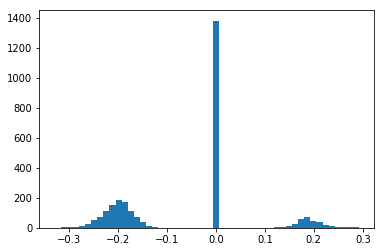

In [14]:
plt.hist(smi_scores,50)
plt.show()

In [15]:
smi['score'] = smi_scores

In [16]:
smi = smi.set_index('Unnamed: 0')
smi

,ID,Name,CAS Number,SMILES,score
Unnamed: 0,,,,,
0,TCS0002,Visnagin,82-57-5,CC1=CC(=O)C2=C(O1)C=C3C(=C2OC)C=CO3,-0.194169
1,TTS0001,Khellin,82-02-0,COC1=C2OC(C)=CC(=O)C2=C(OC)C2=C1OC=C2,0.000000
2,TCS0010,Trans-caffeic acid,501-16-6,C1=CC(=C(C=C1C=CC(=O)O)O)O,0.000000
3,TCS0008,Ethyl (E)-ferulate,28028-62-8,CCOC(=O)C=CC1=CC(=C(C=C1)O)OC,-0.157772
4,TCS0005,Ethyl (E)-3'-hydroxy-4'-methoxycinnamate,155401-23-3,CCOC(=O)C=CC1=CC(=C(C=C1)OC)O,0.000000
...,...,...,...,...,...
2714,TTP2993,Panthenol,16485-10-2,CC(C)(CO)C(O)C(=O)NCCCO,0.000000
2715,TTP2996,L-Ornithine,70-26-8,NCCCC(N)C(O)=O,0.000000
2716,T2P2994,4-Aminobutyric acid,1956-12-2,NCCCC(O)=O,-0.190581
